### Logistic Regression

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Read the Dataset

In [3]:
df= pd.read_csv('iris.csv')
df.head()   

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

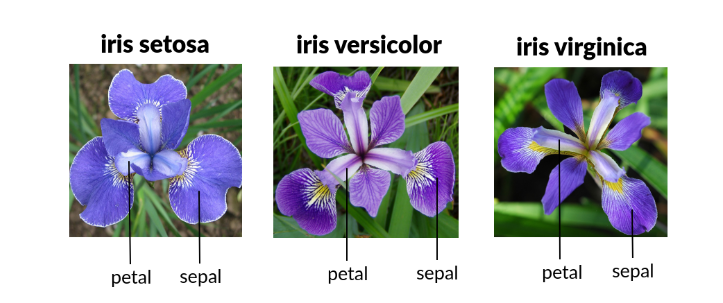

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y features

In [7]:
x= df.drop(columns=['species'],axis=1)
y= df[['species']]

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Label encoding on speciees column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['species']= le.fit_transform(y['species'])

In [11]:
y['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Apply preprocessig pipeling on x feature

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [14]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [15]:
x_pre= num_pipe.fit_transform(x)

In [16]:
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
cols= num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [18]:
xpre= pd.DataFrame(x_pre,columns=cols)

In [19]:
xpre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Seperate Training and Testing Data

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xpre, y, test_size= 0.2, random_state= 55)

In [21]:
xtrain.shape

(120, 4)

In [22]:
xtest.shape

(30, 4)

### create Logistic regression model


In [23]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [24]:
model.intercept_

array([-0.21045385,  1.76443914, -1.55398528])

In [25]:
model.coef_

array([[-0.96930181,  1.30825019, -1.66484905, -1.57063027],
       [ 0.64936618, -0.58334568, -0.40282764, -0.86423514],
       [ 0.31993563, -0.72490452,  2.06767669,  2.43486541]])

### Predict Training and testing Data

In [26]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [27]:
ypred_tr

array([0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 0])

In [28]:
ypred_ts 

array([0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1])

In [29]:
ytrain

,species
11,0
1,0
109,2
126,2
30,0
...,...
37,0
55,1
29,0
125,2


In [30]:
ytest

,species
9,0
36,0
8,0
137,2
136,2
12,0
104,2
149,2
15,0
28,0


### Evaluate the Model

In [31]:
# Acuracy for training
model.score(xtrain,ytrain)

0.9666666666666667

In [32]:
# Accuracy for testing (method1)
model.score(xtest,ytest)

0.9333333333333333

In [33]:
# To check accuracy mannually (method2)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)

In [34]:
tr_acc

0.9666666666666667

In [35]:
ts_acc

0.9333333333333333

### View confussion metrics for test data

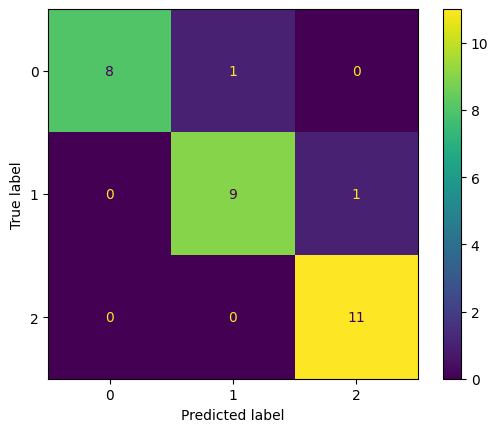

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [37]:
# True Prediction
(8+9+11)/30
# (no. of true predictions / (total no. of true predictions + false predictions))

0.9333333333333333

### Print the classsifiction report

In [38]:
from sklearn.metrics import classification_report
classification_report(ytest,ypred_ts)

'              precision    recall  f1-score   support\n\n           0       1.00      0.89      0.94         9\n           1       0.90      0.90      0.90        10\n           2       0.92      1.00      0.96        11\n\n    accuracy                           0.93        30\n   macro avg       0.94      0.93      0.93        30\nweighted avg       0.94      0.93      0.93        30\n'

In [39]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      0.90      0.90        10
           2       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### Getting original species from predictions

In [40]:
model.predict_proba(xtest)
# Here mode wwill check that which species has highest probability among 3 
# and species having highest probability will be the predicted result.

array([[9.37198326e-01, 6.28005158e-02, 1.15866233e-06],
       [9.65053534e-01, 3.49459468e-02, 5.19283677e-07],
       [9.42210377e-01, 5.77877588e-02, 1.86392658e-06],
       [1.67476314e-03, 1.82114227e-01, 8.16211010e-01],
       [3.28899480e-04, 1.49415662e-02, 9.84729534e-01],
       [9.26582159e-01, 7.34165755e-02, 1.26558985e-06],
       [6.87940839e-05, 2.53055093e-02, 9.74625697e-01],
       [4.97893935e-03, 2.35578816e-01, 7.59442244e-01],
       [9.98522038e-01, 1.47791416e-03, 4.77289976e-08],
       [9.67691517e-01, 3.23078396e-02, 6.43363851e-07],
       [9.96776863e-01, 3.22309302e-03, 4.35713209e-08],
       [5.14917547e-02, 6.65491173e-01, 2.83017072e-01],
       [5.25524200e-05, 5.39541633e-03, 9.94552031e-01],
       [9.31497216e-01, 6.85008328e-02, 1.95114544e-06],
       [5.28440697e-05, 1.72787499e-02, 9.82668406e-01],
       [2.05655159e-02, 3.28447064e-01, 6.50987421e-01],
       [2.12750381e-03, 7.81100654e-01, 2.16771842e-01],
       [4.90346376e-01, 5.09627

In [41]:
# heck the labels for training and testing
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb= le.inverse_transform(ypred_ts)

In [42]:
ypred_tr_lb

array(['setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'se

In [43]:
ypred_ts_lb

array(['setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

### Prediction for new data

In [44]:
# Since we dont have file to test so create sample data from origial data
df_new= df.sample(10)
df_new

,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.6,1.4,0.1,setosa
29,4.7,3.2,1.6,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
141,6.9,3.1,5.1,2.3,virginica
139,6.9,3.1,5.4,2.1,virginica
38,4.4,3.0,1.3,0.2,setosa
93,5.0,2.3,3.3,1.0,versicolor
116,6.5,3.0,5.5,1.8,virginica
0,5.1,3.5,1.4,0.2,setosa


In [45]:
ynew= df_new[['species']]
ynew

,species
37,setosa
29,setosa
39,setosa
80,versicolor
141,virginica
139,virginica
38,setosa
93,versicolor
116,virginica
0,setosa


In [46]:
df_new =df_new.drop(columns=['species'],axis=1)
df_new

,sepal_length,sepal_width,petal_length,petal_width
37,4.9,3.6,1.4,0.1
29,4.7,3.2,1.6,0.2
39,5.1,3.4,1.5,0.2
80,5.5,2.4,3.8,1.1
141,6.9,3.1,5.1,2.3
139,6.9,3.1,5.4,2.1
38,4.4,3.0,1.3,0.2
93,5.0,2.3,3.3,1.0
116,6.5,3.0,5.5,1.8
0,5.1,3.5,1.4,0.2


In [47]:
df_new.to_csv('sample.csv',index= False)

### Read sample.csv

In [48]:
df2 = pd.read_csv('sample.csv')
df2

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.6,1.4,0.1
1,4.7,3.2,1.6,0.2
2,5.1,3.4,1.5,0.2
3,5.5,2.4,3.8,1.1
4,6.9,3.1,5.1,2.3
5,6.9,3.1,5.4,2.1
6,4.4,3.0,1.3,0.2
7,5.0,2.3,3.3,1.0
8,6.5,3.0,5.5,1.8
9,5.1,3.5,1.4,0.2


In [51]:
# Function for prediction for new data.
import numpy as np
def predict_data(df, num_pipe, le, model):
    xnew = num_pipe.transform(df)
    xnew = pd.DataFrame(xnew, columns= num_pipe.get_feature_names_out())
    pred = model.predict(xnew)
    prob = model.predict_proba(xnew)
    pred_lb = le.inverse_transform(pred)
    return pred_lb,prob

In [53]:
pred, prob = predict_data(df2,num_pipe,le,model)

In [54]:
pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [55]:
prob

array([[9.92979282e-01, 7.02062226e-03, 9.56371151e-08],
       [9.66621120e-01, 3.33777330e-02, 1.14696947e-06],
       [9.71362428e-01, 2.86368888e-02, 6.82955516e-07],
       [1.57289394e-02, 9.50571365e-01, 3.36996955e-02],
       [1.49094493e-04, 5.16474910e-02, 9.48203415e-01],
       [2.20049378e-04, 7.84871389e-02, 9.21292812e-01],
       [9.64380538e-01, 3.56184959e-02, 9.66349133e-07],
       [4.23317372e-02, 9.44116854e-01, 1.35514090e-02],
       [8.96613805e-04, 1.83350958e-01, 8.15752428e-01],
       [9.82555856e-01, 1.74437940e-02, 3.49923469e-07]])

In [56]:
ynew['predicted']= pred

In [57]:
ynew

,species,predicted
37,setosa,setosa
29,setosa,setosa
39,setosa,setosa
80,versicolor,versicolor
141,virginica,virginica
139,virginica,virginica
38,setosa,setosa
93,versicolor,versicolor
116,virginica,virginica
0,setosa,setosa
